# Cars4U Project

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

1.  S.No. : Serial Number
2.  Name : Name of the car which includes Brand name and Model name
3.  Location : The location in which the car is being sold or is available for purchase Cities
4.  Year : Manufacturing year of the car
5.  Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6.  Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7.  Transmission : The type of transmission used by the car. (Automatic / Manual)
8.  Owner : Type of ownership
9.  Mileage : The standard mileage offered by the car company in kmpl or km/kg
10. Engine : The displacement volume of the engine in CC.
11. Power : The maximum power of the engine in bhp.
12. Seats : The number of seats in the car.
13. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
14. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

In [1]:
# Import necessary libraries.
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.linear_model import LinearRegression


# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
Data = pd.read_csv('used_cars_data.csv') 

In [3]:
# let us make another copy of data
df = Data.copy()
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.shape

(7253, 14)

In [5]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


It's adviced to replace the spaces with "_" hence the below 

In [7]:
df.columns = [col.replace(' ','_') for col in df.columns]
df.columns = [col.replace('/','_') for col in df.columns]
df.columns = [col.replace('-','_') for col in df.columns]

In [8]:
df.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

We need to fill in the missing values with their medians. As in this case medians will be better suited that mean.

In [9]:
# we will replace missing values in every column with its medain
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

In [10]:
# Check the unique values in each column of the dataframe.
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [11]:
# this loop prints the names of the columns where there is
# at least one entry ending with the character 'kmpl or km/kg'
#character_cols = []
#for colname in df.columns[df.dtypes == 'object']:  # only need to consider string columns
 #   if df[colname].str.endswith('kmpl','km/kg').any():  # using `.str` so I can use an element-wise string method
  #      character_cols.append(colname)
#print(character_cols)
character_cols= ['Mileage', 'Engine', 'Power']
print(character_cols)

['Mileage', 'Engine', 'Power']


We need to remove the characters in the above columns so that we can comfortably use the Numeric data in them

In [12]:
#v1= lambda x:float(x[1,-1])
def character_to_num(character_val):
    return float(character_val)

In [13]:
df['Power'] = df['Power'] .str.replace('bhp','')
df['Power'] = df['Power'] .str.replace('null','0')
df['Mileage'] = df['Mileage'] .str.replace('kmpl','')
df['Mileage'] = df['Mileage'] .str.replace('km/kg','')
df['Engine'] = df['Engine'] .str.replace('CC','')
#df['Power'] = df['Power'].apply(v1)
for colname in character_cols:
    df[colname] = df[colname].apply(character_to_num)
df[character_cols].head()

,Mileage,Engine,Power
0,26.60,998.0,58.16
1,19.67,1582.0,126.20
2,18.20,1199.0,88.70
3,20.77,1248.0,88.76
4,15.20,1968.0,140.80


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7207 non-null   float64
 11  Seats              7253 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              7253 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 793.4+ KB


In [15]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.000,NaN,NaN,NaN,3626.000,2093.905,0.000,1813.000,3626.000,5439.000,7252.000
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.000,NaN,NaN,NaN,2013.365,3.254,1996.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,7253.000,NaN,NaN,NaN,58699.063,84427.721,171.000,34000.000,53416.000,73000.000,6500000.000
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.000,NaN,NaN,NaN,18.142,4.562,0.000,15.170,18.160,21.100,33.540
Engine,7207.000,NaN,NaN,NaN,1616.573,595.285,72.000,1198.000,1493.000,1968.000,5998.000


In [16]:
Name = df["Name"].str.split(" ", n = 1, expand = True) 
Name.head()

,0,1
0,Maruti,Wagon R LXI CNG
1,Hyundai,Creta 1.6 CRDi SX Option
2,Honda,Jazz V
3,Maruti,Ertiga VDI
4,Audi,A4 New 2.0 TDI Multitronic


In [17]:
df.drop(['Name'], axis=1, inplace=True)
df["Name_Brand"]= Name[0]   
df["Name_Model"]= Name[1]

In [18]:
df.median()

S.No.                3626.000
Year                 2014.000
Kilometers_Driven   53416.000
Mileage                18.160
Engine               1493.000
Power                  91.720
Seats                   5.000
Price                   5.640
dtype: float64

In [19]:
# we will replace missing values in every column with its medain
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

In [20]:
df.head()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Brand,Name_Model
0,0,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,NaN,1.750,Maruti,Wagon R LXI CNG
1,1,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,NaN,12.500,Hyundai,Creta 1.6 CRDi SX Option
2,2,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.61 Lakh,4.500,Honda,Jazz V
3,3,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,NaN,6.000,Maruti,Ertiga VDI
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,NaN,17.740,Audi,A4 New 2.0 TDI Multitronic


# Basic Summary Statistics and Consequences

In [21]:
df.describe().T  # quick summary of numeric features

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.000,3626.000,2093.905,0.000,1813.000,3626.000,5439.000,7252.000
Year,7253.000,2013.365,3.254,1996.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,7253.000,58699.063,84427.721,171.000,34000.000,53416.000,73000.000,6500000.000
Mileage,7253.000,18.142,4.562,0.000,15.170,18.160,21.100,33.540
Engine,7253.000,1615.790,593.475,72.000,1198.000,1493.000,1968.000,5998.000
Power,7253.000,110.626,54.927,0.000,74.000,91.720,138.030,616.000
Seats,7253.000,5.278,0.809,0.000,5.000,5.000,5.000,10.000
Price,7253.000,8.826,10.293,0.440,3.850,5.640,8.400,160.000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7253 non-null   float64
 9   Power              7253 non-null   float64
 10  Seats              7253 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              7253 non-null   float64
 13  Name_Brand         7253 non-null   object 
 14  Name_Model         7253 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 850.1+ KB


In [23]:
# looking at value counts for non-numeric features

num_to_display = 11  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == 'object'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64



Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64



Manual       5204
Automatic    2049
Name: Transmission, dtype: int64



First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64



NaN           6247
63.71 Lakh       6
33.36 Lakh       6
4.78 Lakh        6
95.13 Lakh       6
11.26 Lakh       5
5.04 Lakh        5
47.87 Lakh       5
9.12 Lakh        5
15.05 Lakh       5
20.74 Lakh       5
Name: New_Price, dtype: int64
Only displaying first 11 of 626 values.



Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          

We can derive a lot from the above: 

1- There are 11 uniques locations in the whole data set

2- Electric cars are the least to be found in the used car market.

3- Diesel closely followed by Petrol dominate the market.

4- Manual cars have a very high count

5- First hand cars dominate the used car market

6- There seems to be too many New_Price values missing and it has to be dropped

# Univariative Analysis

In [24]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [25]:
df.head()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Brand,Name_Model
0,0,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,NaN,1.750,Maruti,Wagon R LXI CNG
1,1,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,NaN,12.500,Hyundai,Creta 1.6 CRDi SX Option
2,2,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.61 Lakh,4.500,Honda,Jazz V
3,3,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,NaN,6.000,Maruti,Ertiga VDI
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,NaN,17.740,Audi,A4 New 2.0 TDI Multitronic


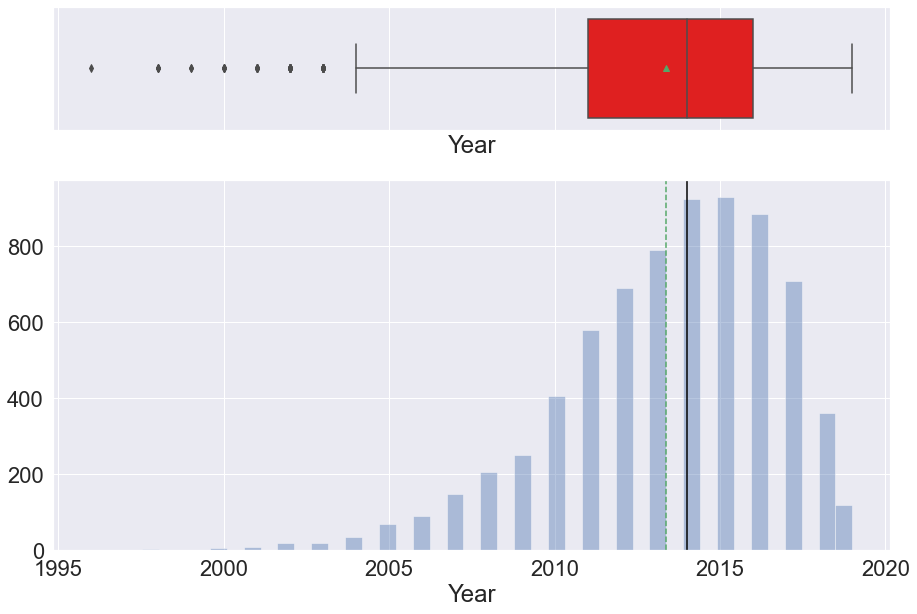

In [26]:
histogram_boxplot(df.Year)

# Univariative Analysis of Numerical Variable

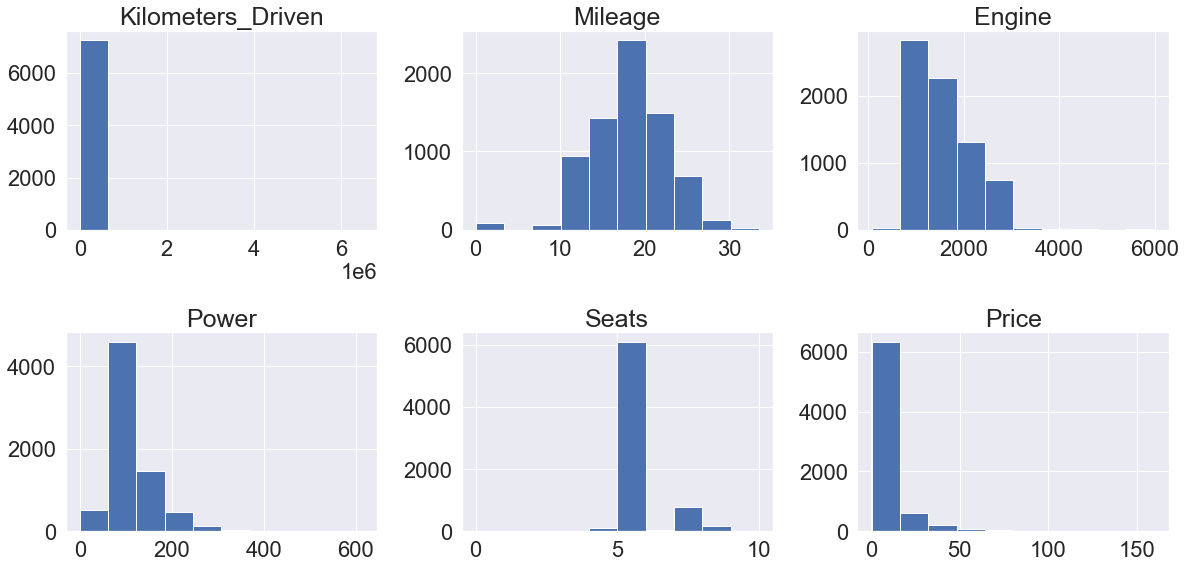

In [27]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
all_col.remove('Year')
all_col.remove('S.No.')
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

# Lets Observe the Outliers present in every numerical Column

In [28]:
print(numeric_columns)

['S.No.', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


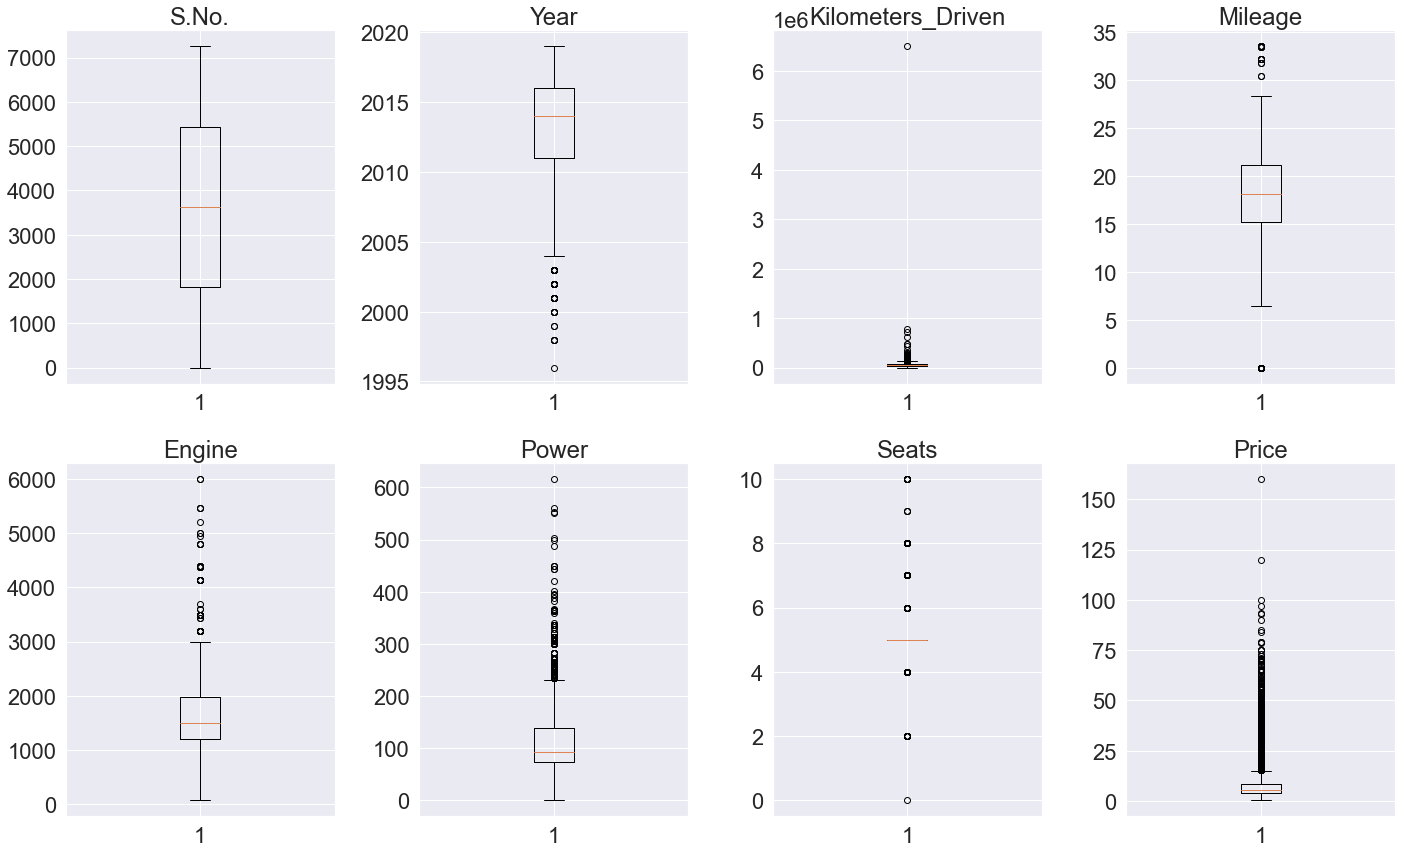

In [29]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()


While chacking on the outliers we see that kilometers driven has a few extremely high values which will tamper with the study of the rest of the data hence we must rectify it.

# Bivariative Analysis

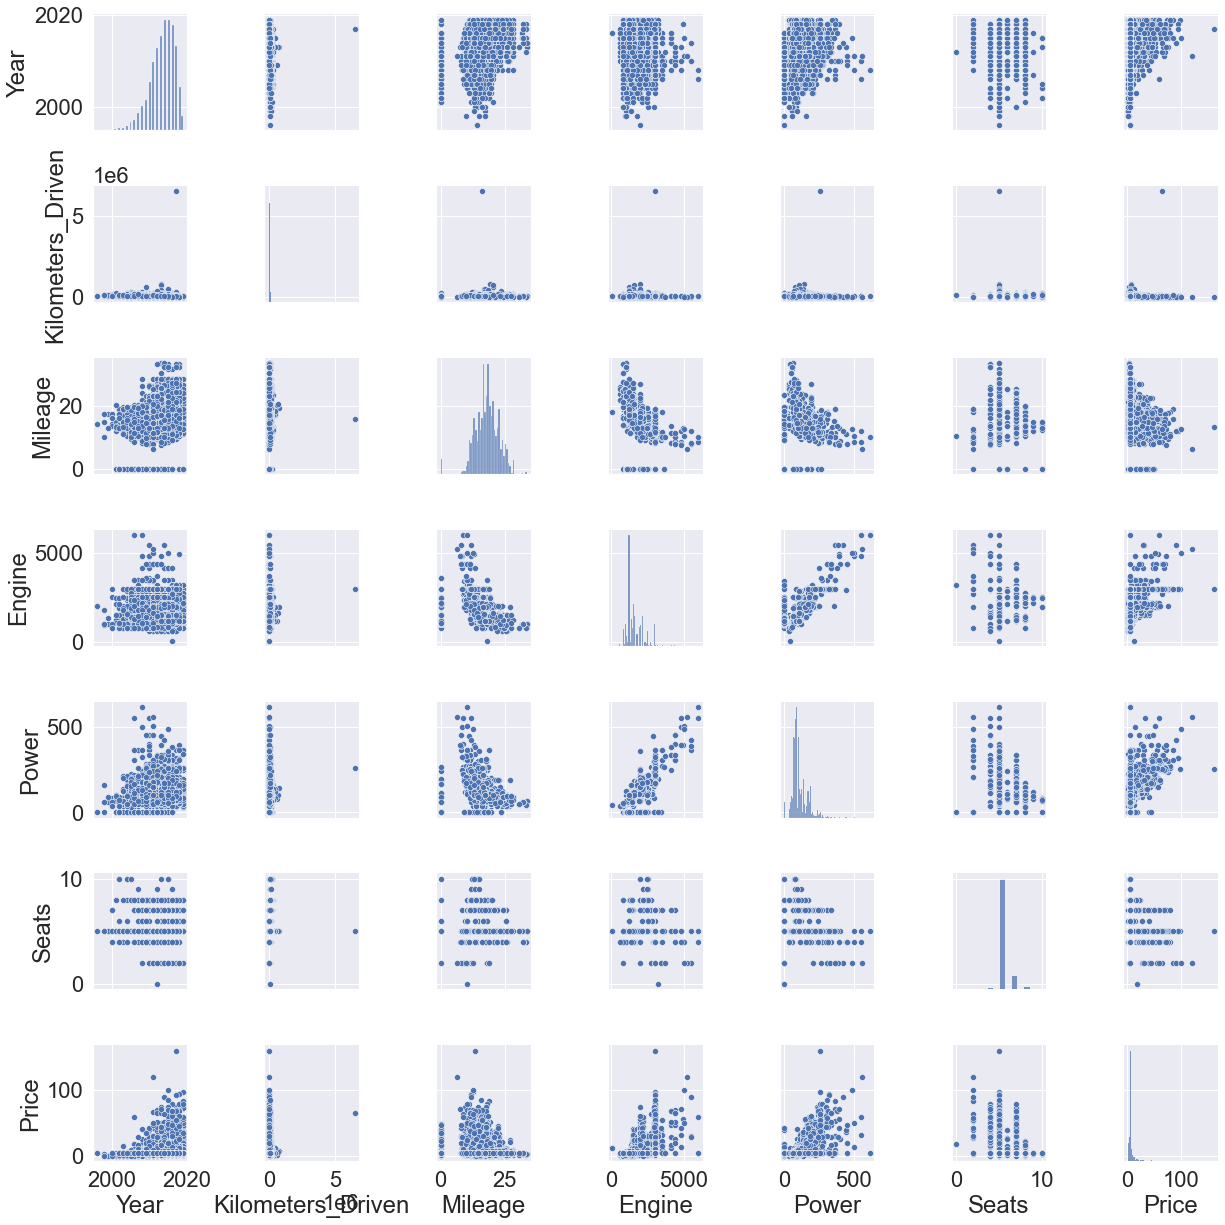

In [30]:
#df['is_GK'] = df['Position'] == 'GK'  # for hue
cols_to_exclude = ['S.No.']
sns.pairplot(df[[colname for colname in df.columns if colname not in cols_to_exclude]])
#df.drop(['is_GK'], axis=1, inplace=True)

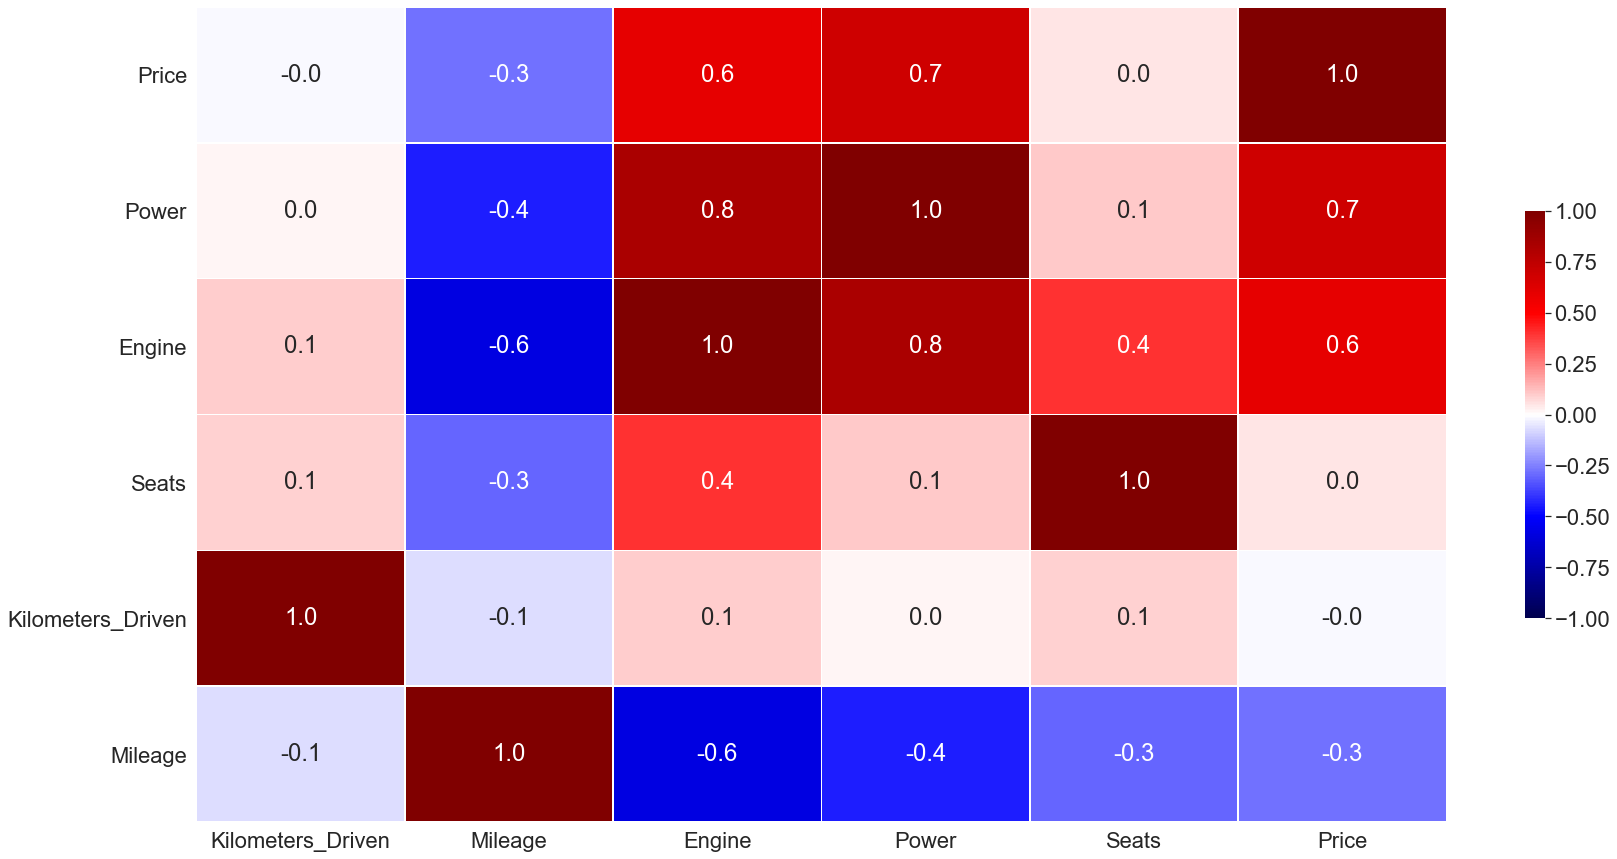

In [31]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('Year') # dropping year column as it is temporal variable
numeric_columns.remove('S.No.')
corr = df[numeric_columns].corr().sort_values(by=['Price'],ascending=False) # sorting correlations w.r.t life expectancy  


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

# Let us observe those Variables that is Highly correlated with Price

Price vs Power 

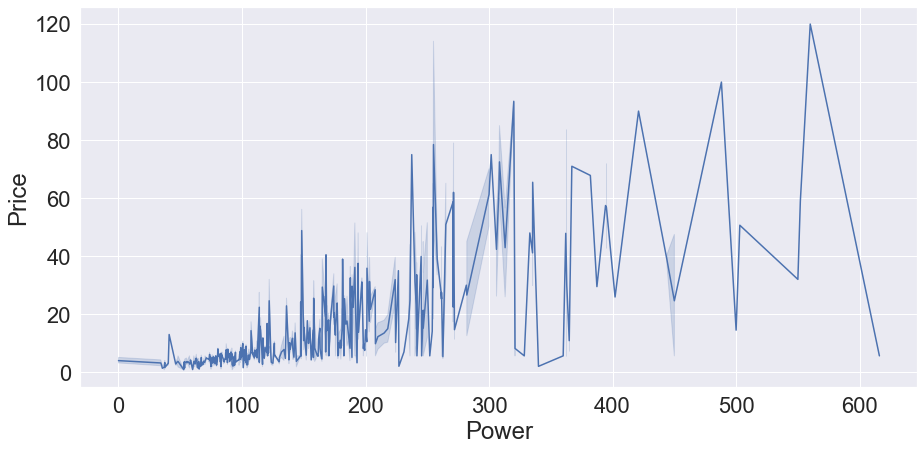

In [32]:
# How does  vary year by year
plt.figure(figsize=(15,7))
sns.lineplot(x='Power', y='Price',
             data=df);

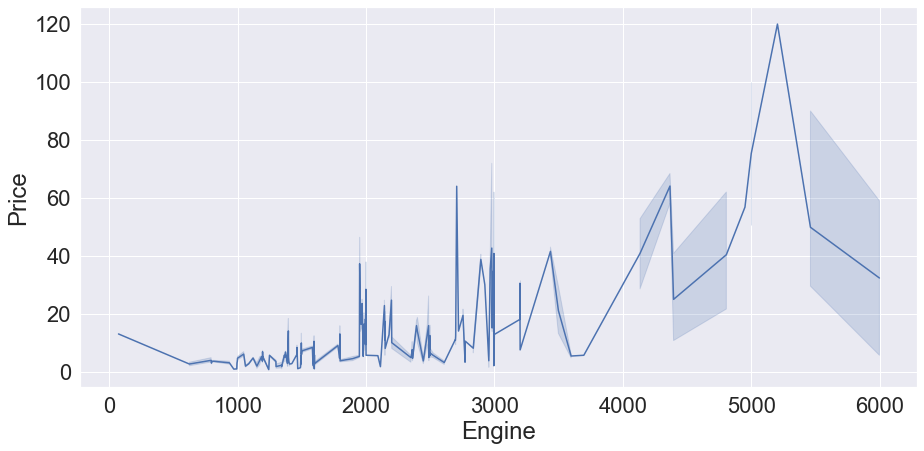

In [33]:
# How does  vary year by year
plt.figure(figsize=(15,7))
sns.lineplot(x='Engine', y='Price',
             data=df);

# Multivariative Analysis

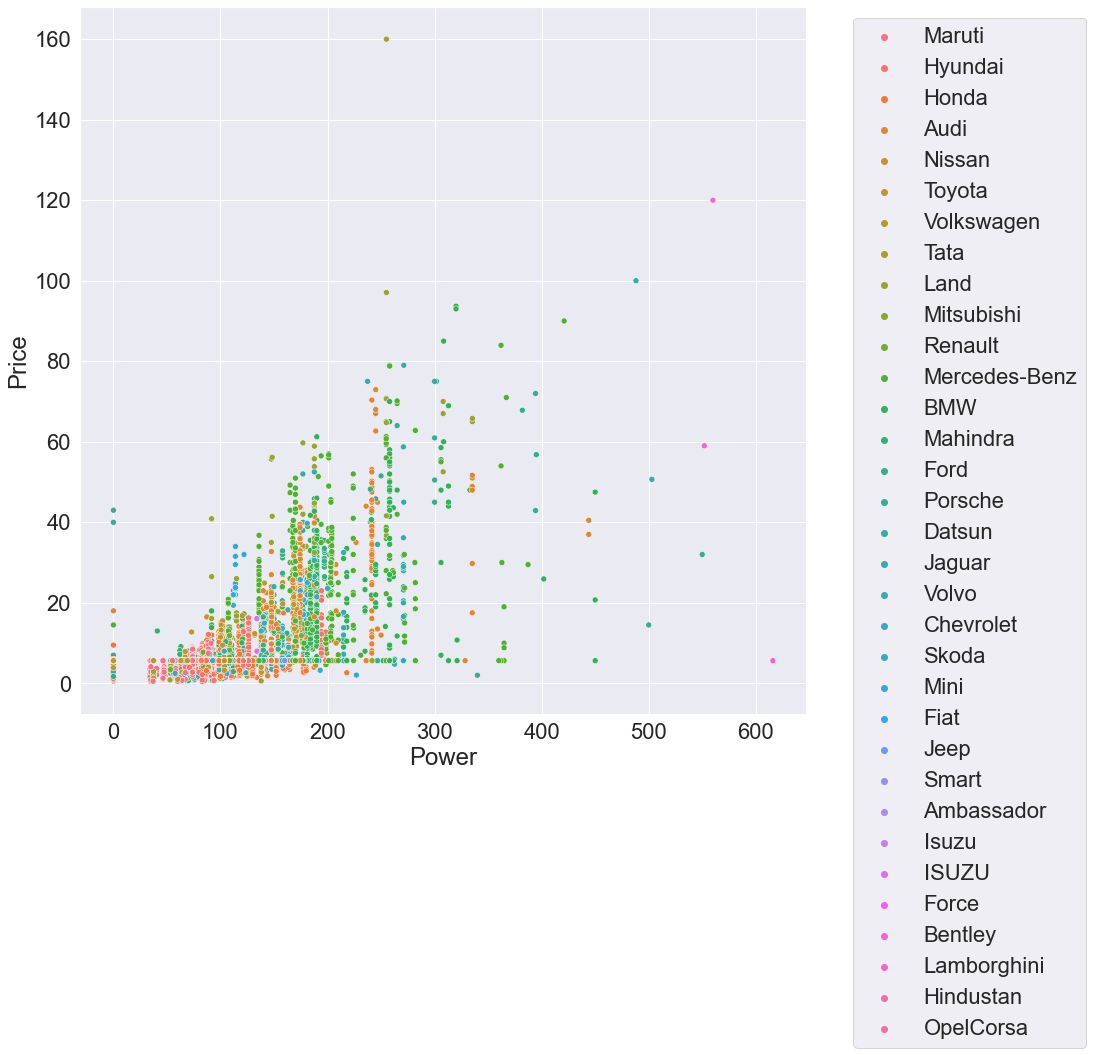

In [34]:
# Lets look visualize the relationship 
plt.figure(figsize=(13,13))
g=sns.scatterplot(y='Price', x='Power', hue='Name_Brand', data=df);
g.legend(bbox_to_anchor=(1.05, 1), loc=2)

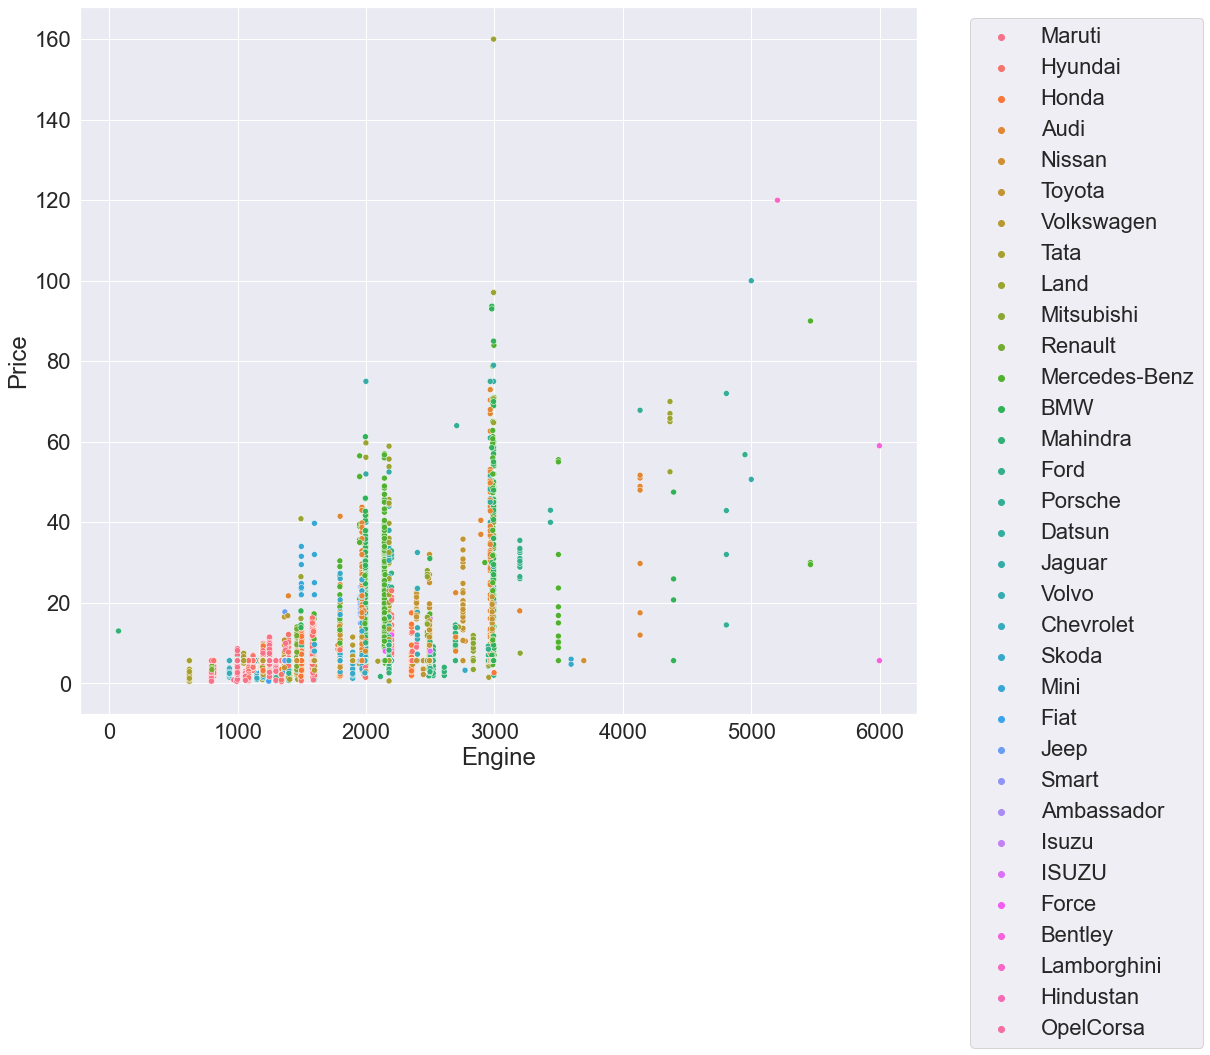

In [35]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
g= sns.scatterplot(y='Price', x='Engine', hue='Name_Brand', data=df);
g.legend(bbox_to_anchor=(1.05, 1), loc=2)

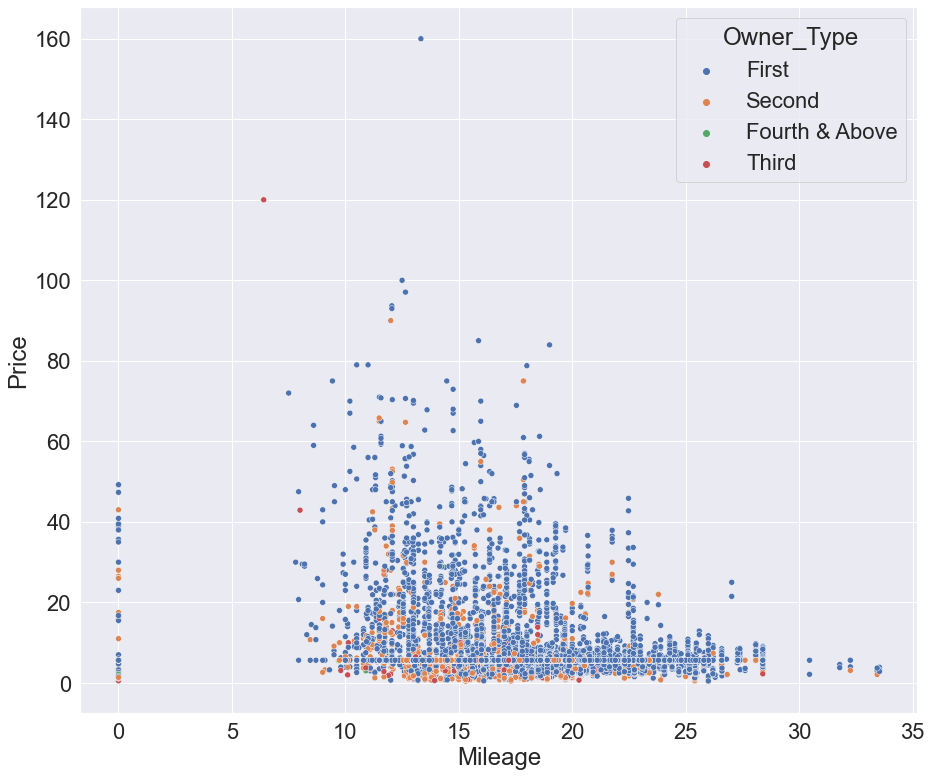

In [36]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Mileage', hue='Owner_Type', data=df);

# Data Preparation

# Fix Data Type

In [37]:
# Converting object type column to category type
#df['Name'] = df['Name'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner_Type'] = df['Owner_Type'].astype('category')
df['Name_Brand'] = df['Name_Brand'].astype('category')

In [38]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [39]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)
#df= treat_outliers(df,"Kilometers_Driven")

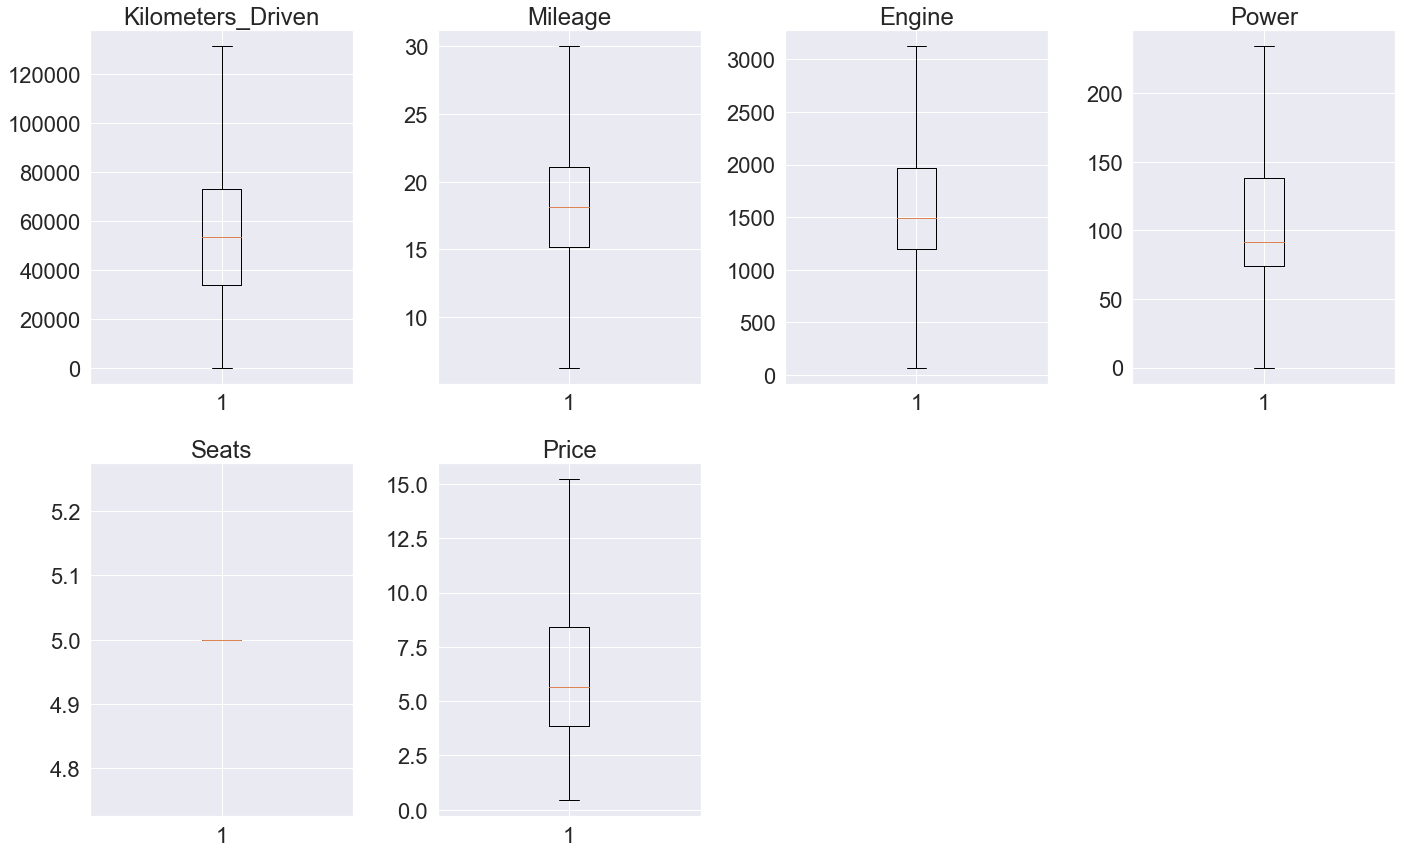

In [40]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()


Now we have removed the more absurd outliers which was present in kilometers driven alone

In [41]:
print(numeric_columns)

['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


# Model Building

# Split Data

In [42]:
# lets build our linear model
# independant variables
X = df.drop(['Price','Name_Brand','Name_Model', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'New_Price'], axis=1)
# the dependent variable
y = df[['Price']]

In [43]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Fit Linear Model

In [44]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [45]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for S.No. is -0.00017394214885518183
The coefficient for Year is 0.45184941941561724
The coefficient for Kilometers_Driven is -4.826638755135476e-06
The coefficient for Mileage is -0.01946200242973541
The coefficient for Engine is 0.0022676720109459526
The coefficient for Power is 0.03675351862662914
The coefficient for Seats is 0.0


In [46]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -909.3309892614108


In [47]:
regression_model.score(X_train, y_train)

0.6462112545503871

In [48]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)

0.659725181578884